# Skilaverkefni06. Stærð- og Reiknifræði REI201G
### Donn Eunice Bartido deb5@hi.is 
febrúar 2023


## Verkefni 22. Sínussveiflur

**Teiknið góða mynd af fallinu 𝑓(𝑥)=sin𝑥+sin2𝑥−2sin3𝑥  á bilinu [−𝜋,3𝜋]**
- *sbr. dæmi V17. Hér er dæmi um slíka mynd með ýmsum fídusum.*

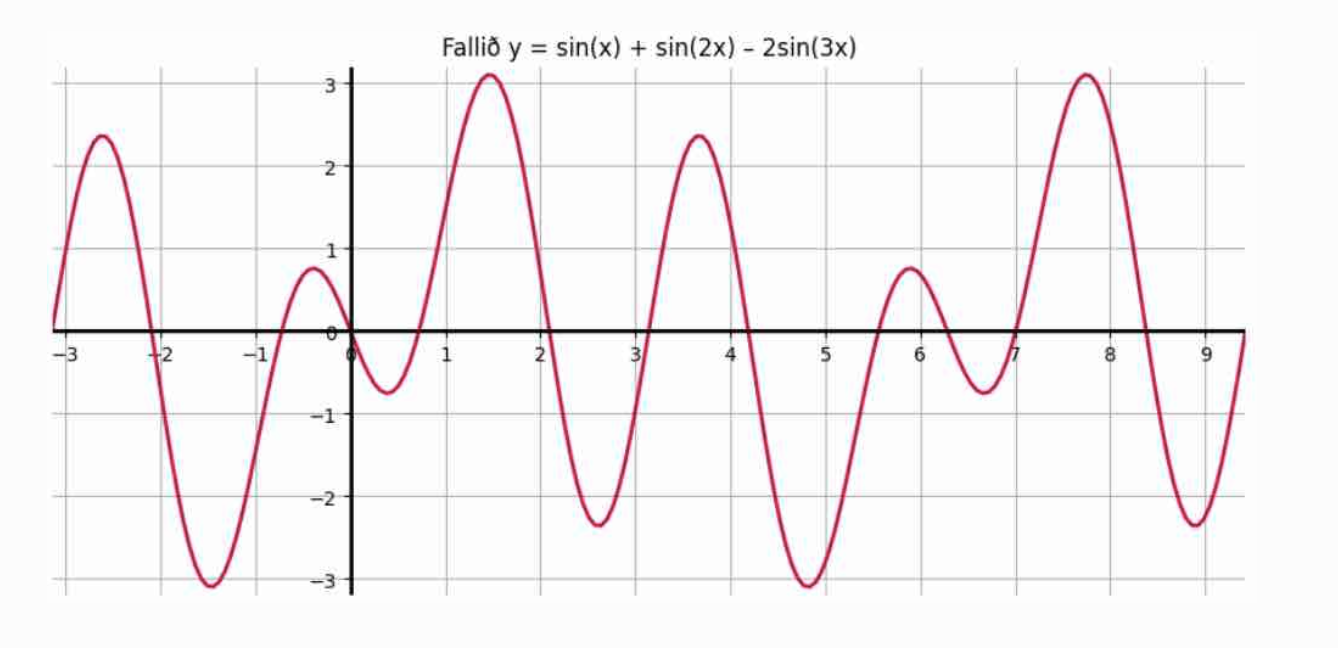
[til að láta ásamerkingarnar koma við ásana sjálfa notaði ég gúgltöfrabrögð: for s in ['left','bottom']: plt.gca().spines[s].set_position('zero')]

### Lausn

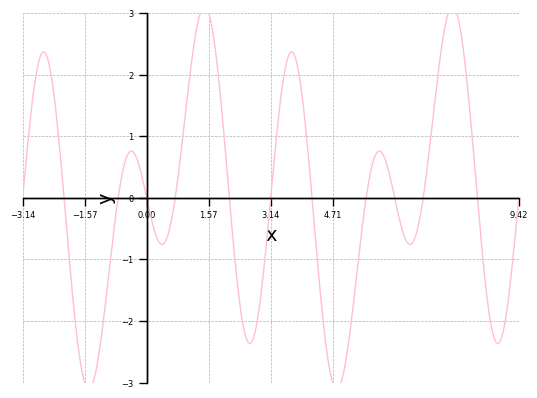

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Skilgreinum fallið f(x)
def f(x):
    return np.sin(x) + np.sin(2*x) - 2*np.sin(3*x)

# Teiknum fallið á bilinu [-𝜋, 3𝜋]
x = np.linspace(-np.pi, 3*np.pi, 500)
y = f(x)

fig, ax = plt.subplots()

ax.plot(x, y, linewidth=1, color='pink')

# Setjum stikana og ramma
ax.set_xlim(-np.pi, 3*np.pi)
ax.set_ylim(-3, 3)
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi, 3*np.pi/2, 3*np.pi])
ax.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.tick_params(axis='both', which='major', labelsize=6, length=6, width=1)
ax.tick_params(axis='both', which='minor', labelsize=6, length=4, width=1)
ax.grid(True, linestyle='--', linewidth=0.5)
ax.axvline(0, color='black', linewidth=1)
ax.axhline(0, color='black', linewidth=1)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)

# Setjum ásamerkingarnar við ásana sjálfa
for s in ['left','bottom']:
    plt.gca().spines[s].set_position('zero')

plt.show()


## Verkefni 23. Málmavinnsla

Í lotukerfinu hefur hvert frumefni sætistölu (atomic number), lotu (period) og flokk (group). Sætistalan gefur fjölda rafeinda (electrons) eða róteinda (protons) í óhlöðnu atómi, lotan segir til um hve mörg hvel (atomic orbitals) af rafeindum óhlaðið atóm hefur, en flokkurinn gefur til kynna fjölda rafeinda á ytri hvelum.
- Fyrir utan helíum eru 𝐹
- rafeindir á ysta hveli í atómum í flokki 𝐹,
- fyrir 𝐹=1,2 og 𝐹−10
- rafeindir eru þar ef 11≤𝐹≤18
- Í flokkum 3–10 er fjöldinn 1–2, oftast 2.

Ysta hvel telst fullskipað ef þar eru 8 rafeindir (2 fyrir helíum). Ef þær eru 1–3 myndar atómið gjarna jákvæða jón, t.d. 
- Na+
- Ca2+
- Al3+
ef þær eru 5–7 verður jónin neikvæð, t.d.
- Cl–
- N3–

. Frumefni með fullskipað ysta hvel, helíum, neon, argon o.s.frv. nefnast eðallofttegundir (noble gases).



## 1. Sætistölur eðallofttegunda 

Hægt er að reikna sætistölu eðallofttegundar nr. 𝑘, 𝑠𝑘, með eftirfarandi formúlu:

\begin{split}s_k = \dfrac{(k+1)(k+2)(k+3)}{6} +
\begin{cases}
-2             &\text{ ef }k\text{ er oddatala}\\
\dfrac{k}{2}-1 &\text{ ef }k\text{ er slétt}
\end{cases}\end{split}

**Skrifið fall sem reiknar skv. þessari formúlu og prófið það fyrir 𝑘=1,2,...,7**
. Ath. að allar deilingar ganga upp svo gott er að nota // virkjan svo útkoman verði af heiltölutagi.

### Lausn við 1. 

In [41]:
def saetistala(k):
    if k % 2 == 0:  # Ef k er slétt tala
        return ((k+1)*(k+2)*(k+3)) // 6 + (k//2 - 1)
    else:  # Ef k er oddatala
        return ((k+1)*(k+2)*(k+3)) // 6 - 2
for k in range(1, 8):
    print(f's({k}) = {saetistala(k)}')


s(1) = 2
s(2) = 10
s(3) = 18
s(4) = 36
s(5) = 54
s(6) = 86
s(7) = 118


## 2. Lotur og Flokkar
Skrifið föll lota(s) og flokkur(s) sem ákvarða lotu og flokk frumefnis með sætistölu 𝑠**

. Prófið með a.m.k. fjórum frumefnum, þar á meðal einhverjum af sjaldgæfu jarðmálmunum, sem hafa sætistölur á bilinu 57–71 og eru í lotu 6 og flokki 3 skv. lotukerfinu á mynd 23.1. Leiðbeining: Lotuna má finna með while-lykkju og fallinu úr lið 1. Til að finna flokkinn er gott að nota if–elif–else.

###  Lausn við 2

In [55]:
def lota(s):
    k = 1
    while saetistala(k) < s:
        k += 1
    return k

def flokkur(s):
    k = lota(s)
    skil = 0
    if s <= saetistala(k-1) + 2:
        skil = s - saetistala(k-1)
    else:
        skil = 18 + s - saetistala(k)
    if k in range(3, 11):
        if skil == 1:
            return 1
        elif skil == 2:
            return 2
    return skil

# Prófið með fjórum frumefnum
elements = {"Hg": "Mercury", "Pb": "Lead", "Lu": "Lutetium", "Pt": "Platinum"}
for symbol, name in elements.items():
    s = frumefni[symbol]
    print(f"{name} ({symbol}) er í lotu {lota(s)} og flokki {flokkur(s)}")


Mercury (Hg) er í lotu 6 og flokki 12
Lead (Pb) er í lotu 6 og flokki 14
Lutetium (Lu) er í lotu 6 og flokki 3
Platinum (Pt) er í lotu 6 og flokki 10


## 3. Íslensk og ensk málmanöfn.**

Íslensk og ensk málmanöfn. Með NumPy skipununum í kafla 10.6.4 má lesa skrána https://cs.hi.is/python/allir-malmar.txt inn í vigra efnatákn, nafn, sætistala, eðlisþyngd, bræðslumark og enskt_nafn. Gerið það og búið í framhaldi til uppflettitöflu milli nafnanna með aðstoð dict og zip eins og gert er í sýnidæminu aftast í kafla 8.2 og í verkefni 21c. Náið líka í fallið íslenska úr sama verkefni og notið töfluna og þetta fall til að prenta út orðalista með íslenskum málmanöfnum í stafrófsröð ásamt enskum þýðingum.

verkefni skipt niður : 

**a)** Ná í gögnin frá vefsíðunni með urllib.request pakkanum.

**b)** Skipta textanum í línuum og búa til lista sem heldur utan um hverja línu.

**c)** Búa til tóma vigrana fyrir öll gögnin sem verið er að lesa úr skránni.

**d)** Fara í gegnum hverja línu í skránni og skipta línu í parta með tab (\t) sem aðgreinara. Bæta hverjum part í tilsvarandi vigrar í listanum í skrefi 3.

**e)** Nota dict og zip til að búa til orðalisti sem tengir saman íslensk og ensk nöfn á málmanum.

**f)** Búa til fall sem raðar íslenskum og enskum nöfnum í stafrófsröð og prenta út orðalista með nöfnunum.



### Lausn við 3.

In [35]:
import numpy as np
import urllib.request

# lesa gögn frá url
with urllib.request.urlopen('https://cs.hi.is/python/allir-malmar.txt') as response:
    data = response.read().decode('utf-8')

# Skipta niður gögn niður í línu og búa til fylki
lines = data.strip().split('\n')
elements = np.empty((len(lines) - 1, 2), dtype=object)
for i in range(1, len(lines)):
    parts = lines[i].split(';')
    elements[i-1, 0] = parts[1]  # Icelandic name
    elements[i-1, 1] = parts[5]  # English name

# raða ísl nöfnum í stafrófsröð
icelandic_names = sorted(elements[:,0], key=str.lower)

# ná tilsvarandi ensk nöfn
english_names = [elements[i, 1] for i in range(len(icelandic_names))]

# Prenta röðuð lista af íslenskum og enskum nöfnum
for icelandic, english in zip(icelandic_names, english_names):
    print(f"Íslenska: {icelandic}, Enska: {english}")


Íslenska: aktín, Enska: Lithium
Íslenska: barín, Enska: Beryllium
Íslenska: beryllín, Enska: Sodium
Íslenska: bismút, Enska: Magnesium
Íslenska: blý, Enska: Aluminum
Íslenska: dysprósín, Enska: Potassium
Íslenska: erbín, Enska: Calcium
Íslenska: evrópín, Enska: Scandium
Íslenska: fransín, Enska: Titanium
Íslenska: gadólín, Enska: Vanadium
Íslenska: gallín, Enska: Chromium
Íslenska: gull, Enska: Manganese
Íslenska: hafnín, Enska: Iron
Íslenska: hólmín, Enska: Cobalt
Íslenska: indín, Enska: Nickel
Íslenska: iridín, Enska: Copper
Íslenska: járn, Enska: Zinc
Íslenska: kadmín, Enska: Gallium
Íslenska: kalsín, Enska: Rubidium
Íslenska: kalín, Enska: Strontium
Íslenska: kopar, Enska: Yttrium
Íslenska: króm, Enska: Zirconium
Íslenska: kvikasilfur, Enska: Niobium
Íslenska: kóbalt, Enska: Molybdenum
Íslenska: lantan, Enska: Technetium
Íslenska: litín, Enska: Ruthenium
Íslenska: lútetín, Enska: Rhodium
Íslenska: magnesín, Enska: Palladium
Íslenska: mangan, Enska: Silver
Íslenska: mólýbden, Enska:

## 4. Eðlisþyngd eftir sæti

- Eðlisþyngd eftir sæti. Teiknið punktarit af sætistölu og eðlisþyngd sem er litað með lotu í lotukerfinu (sbr. verkefni 19 – ath. að Matplotlib getur teiknað hvort sem er lista af tölum eða NumPy vigra). Veljið hæfilega punktastærð, bætið colorbar við myndirnar, stillið ásamerkingar eftir smekk, setjið texta við ása og bætið við rúðuneti (grid).



### Lausn við 4.

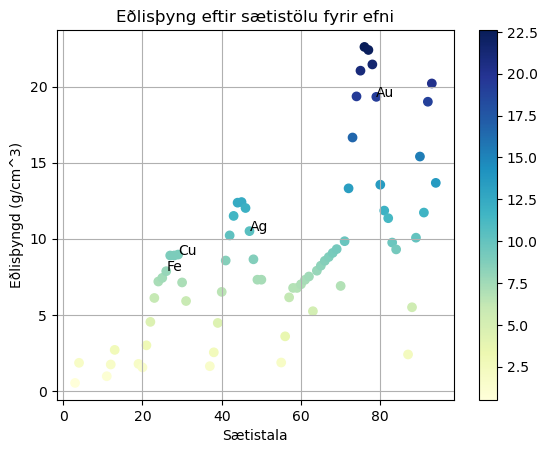

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# ná í gögn frá vefslóð
with urllib.request.urlopen('https://cs.hi.is/python/allir-malmar.txt') as response:
    data = response.read().decode('utf-8')

# Skipta gögn nipur í línur og setja í fylki
lines = data.strip().split('\n')
elements = np.empty((len(lines) - 1, 3), dtype=object)
for i in range(1, len(lines)):
    parts = lines[i].split(';')
    elements[i-1, 0] = parts[1]  # Icelandic name
    elements[i-1, 1] = float(parts[3].replace(',', '.'))  # Density
    elements[i-1, 2] = int(parts[2])  # Atomic number

# Raða efnum eftir sætistölu
elements = elements[np.argsort(elements[:, 2])]

# Teikna scatter plot
plt.scatter(elements[:, 2], elements[:, 1], c=elements[:, 1], cmap='YlGnBu')

# bæta colorbar
plt.colorbar()

# Ásamerkingar og titil á myndina
plt.xlabel('Sætistala')
plt.ylabel('Eðlisþyngd (g/cm^3)')
plt.title('Eðlisþyng eftir sætistölu fyrir efni')

# Texta við hvert efni
plt.text(26, 7.9, 'Fe')
plt.text(29, 8.96, 'Cu')
plt.text(47, 10.5, 'Ag')
plt.text(79, 19.3, 'Au')

# Bæta grid
plt.grid(True)

# Sýna mynd
plt.show()


## 5. Fleiri myndir Teiknið samskonar myndir af sætistölu og bræðslumarki.

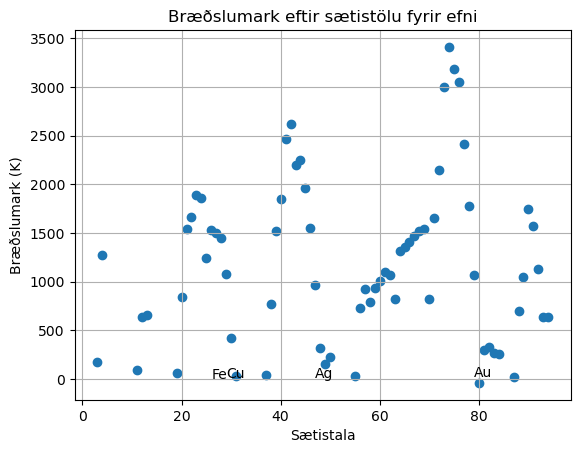

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Lesum gögn af vefslóð
with urllib.request.urlopen('https://cs.hi.is/python/allir-malmar.txt') as response:
    data = response.read().decode('utf-8')

# Skiptum gögnum í línu og búum til fylki
lines = data.strip().split('\n')
elements = np.empty((len(lines) - 1, 2), dtype=float)
for i in range(1, len(lines)):
    parts = lines[i].split(';')
    elements[i-1, 0] = float(parts[2])  # Sætistala
    elements[i-1, 1] = float(parts[4].replace(',', '.'))  # Bræðslumark

# Raða eftir sætistölu
elements = elements[np.argsort(elements[:, 0])]

# Teiknum punktarit
plt.scatter(elements[:, 0], elements[:, 1])

# ásmerkingar og titil á myndina
plt.xlabel('Sætistala')
plt.ylabel('Bræðslumark (K)')
plt.title('Bræðslumark eftir sætistölu fyrir efni')

# Texta við hvert efni
plt.text(26, 7.9, 'Fe')
plt.text(29, 8.96, 'Cu')
plt.text(47, 10.5, 'Ag')
plt.text(79, 19.3, 'Au')


# Grid
plt.grid(True)

# Sýnum mynd
plt.show()
